<a href="https://colab.research.google.com/github/spdin/time-series-prediction-lstm-pytorch/blob/master/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Prediction with LSTM Using PyTorch

This kernel is based on *datasets* from

[Time Series Forecasting with the Long Short-Term Memory Network in Python](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

[Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)


## Download Dataset

In [ ]:
# !wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [2]:
# !wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [4]:
import urllib.request

# 下载数据集
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',
    'shampoo.csv'
)

urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
    'airline-passengers.csv'
)

print("数据集下载完成！")

数据集下载完成！


## Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
# from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

## Data Plot

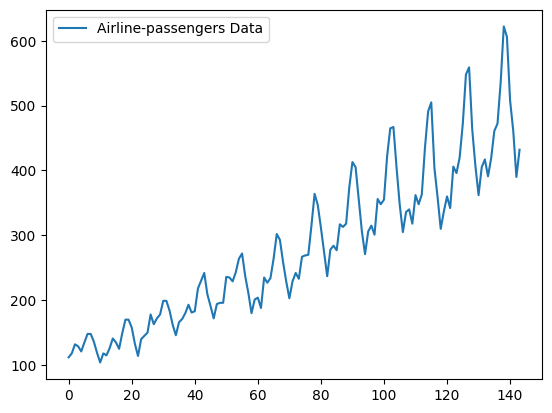

In [ ]:
training_set = pd.read_csv('airline-passengers.csv')
# training_set = pd.read_csv('shampoo.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airline-passengers Data')
plt.legend()
plt.show()

## Dataloading

In [7]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

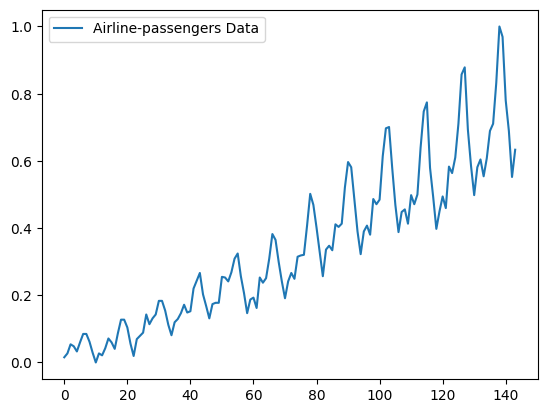

In [8]:
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)
plt.plot(training_data, label = 'Airline-passengers Data')
plt.legend()
plt.show()

In [9]:
seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = torch.Tensor(x)
dataY = torch.Tensor(y)

trainX = torch.Tensor(x[0:train_size])
trainY = torch.Tensor(y[0:train_size])

testX = torch.Tensor(x[train_size:len(x)])
testY = torch.Tensor(y[train_size:len(y)])

In [11]:
print(trainX.shape)
print(trainX)

torch.Size([93, 4, 1])
tensor([[[0.0154],
         [0.0270],
         [0.0541],
         [0.0483]],

        [[0.0270],
         [0.0541],
         [0.0483],
         [0.0328]],

        [[0.0541],
         [0.0483],
         [0.0328],
         [0.0598]],

        [[0.0483],
         [0.0328],
         [0.0598],
         [0.0849]],

        [[0.0328],
         [0.0598],
         [0.0849],
         [0.0849]],

        [[0.0598],
         [0.0849],
         [0.0849],
         [0.0618]],

        [[0.0849],
         [0.0849],
         [0.0618],
         [0.0290]],

        [[0.0849],
         [0.0618],
         [0.0290],
         [0.0000]],

        [[0.0618],
         [0.0290],
         [0.0000],
         [0.0270]],

        [[0.0290],
         [0.0000],
         [0.0270],
         [0.0212]],

        [[0.0000],
         [0.0270],
         [0.0212],
         [0.0425]],

        [[0.0270],
         [0.0212],
         [0.0425],
         [0.0714]],

        [[0.0212],
         [0.0425],
   

## Model

In [0]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

In [332]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.86919
Epoch: 100, loss: 0.01413
Epoch: 200, loss: 0.00797
Epoch: 300, loss: 0.00321
Epoch: 400, loss: 0.00290
Epoch: 500, loss: 0.00277
Epoch: 600, loss: 0.00263
Epoch: 700, loss: 0.00249
Epoch: 800, loss: 0.00236
Epoch: 900, loss: 0.00224
Epoch: 1000, loss: 0.00213
Epoch: 1100, loss: 0.00204
Epoch: 1200, loss: 0.00197
Epoch: 1300, loss: 0.00191
Epoch: 1400, loss: 0.00186
Epoch: 1500, loss: 0.00182
Epoch: 1600, loss: 0.00179
Epoch: 1700, loss: 0.00176
Epoch: 1800, loss: 0.00173
Epoch: 1900, loss: 0.00172


## Testing for Shampoo Sales Dataset

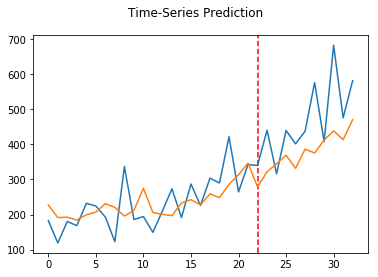

In [281]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

## Testing for Airplane Passengers Dataset

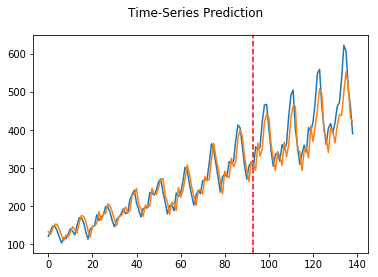

In [333]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()